In [3]:
import sklearn.datasets as d
import pandas as pd

유방암 진단 예측 모델

In [6]:
x = d.load_breast_cancer()
df = pd.DataFrame(data = x.data, columns = x.feature_names)
df['target'] = x.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

## DecisionTree 학습

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [21]:
dt_clf = DecisionTreeClassifier(random_state = 42) 
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
# 학습 내용으로 y_train 예측값
y_train_pred = dt_clf.predict(X_train)

# 학습 내용으로 test데이터를 통한 y_test 예측값
y_pred = dt_clf.predict(X_test)

In [23]:
# 평가
import sklearn.metrics as mt

print('Train_Accuracy: ', dt_clf.score(X_train, y_train),'\n')

train_accuracy = mt.accuracy_score(y_train, y_train_pred)
train_recall = mt.recall_score(y_train, y_train_pred)
train_precision = mt.precision_score(y_train, y_train_pred)
train_f1_score = mt.f1_score(y_train, y_train_pred)
train_matrix = mt.confusion_matrix(y_train, y_train_pred)

print('Accuracy: ', format(train_accuracy, '.2f'), '\n')
print('Recall: ', format(train_recall, '.2f'), '\n')
print('Precision: ', format(train_precision, '.2f'), '\n')
print('f1_Score: ', format(train_f1_score, '.2f'), '\n')
print('Confusion_matrix: ', '\n', train_matrix)

Train_Accuracy:  1.0 

Accuracy:  1.00 

Recall:  1.00 

Precision:  1.00 

f1_Score:  1.00 

Confusion_matrix:  
 [[149   0]
 [  0 249]]


In [24]:
accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy, '.2f'), '\n')
print('Recall: ', format(recall, '.2f'), '\n')
print('Precision: ', format(precision, '.2f'), '\n')
print('f1_Score: ', format(f1_score, '.2f'), '\n')
print('Confusion_matrix: ', '\n', matrix)

Accuracy:  0.94 

Recall:  0.94 

Precision:  0.97 

f1_Score:  0.95 

Confusion_matrix:  
 [[ 60   3]
 [  7 101]]


검증 데이터 셋을 나누는 이유
일정한 하나의 test set으로 계속해서 평가를 진행하거나 하나의 트레인셋으로 학습을 진행하면 과적합이 쉽게 일어납니다. 그리고 일부 테스트셋에서만 좋은 성능을 보였다고 생각할 수 있기 때문에 검증방식을 바꿀 필요가 있습니다.

In [25]:
from sklearn.model_selection import cross_val_score, cross_validate

# 각 폴더의 스코어
scores = cross_val_score(dt_clf, X, y, cv = 5)
print(scores)

print('교차 검증 평균 : ', scores.mean())

[0.9122807  0.90350877 0.92982456 0.95614035 0.88495575]
교차 검증 평균 :  0.9173420276354604


In [26]:
pd.DataFrame(cross_validate(dt_clf, X, y, cv = 5))

,fit_time,score_time,test_score
0,0.015958,0.003989,0.912281
1,0.019935,0.006983,0.903509
2,0.017950,0.005986,0.929825
3,0.021941,0.002992,0.956140
4,0.021942,0.005984,0.884956


## 하이퍼 파라미터 튜닝

- criterion : 이론 파트에서 다룬 노드 분리기준입니다. 'gini'와 'entropy'를 사용합니다.

- splitter : 노드 분리 방법으로 'random', 'best'를 사용합니다.

- max_depth : 트리 모형의 최대 깊이를 의미하며 값이 커질수록 깊어져 과적합이 쉽게 일어납니다.

- min_samples_split : 중간노드에서 분리가 일어나기 위한 샘플의 수입니다. 

- min_samples_leaf : leaf 노드에서 필요한 최소한의 샘플 수이며 너무 적으면 과적합이 일어날 수 있습니다.

- max_features : 노드를 분리할 때 고려하는 속성의 수입니다. 'int', 'float', 'auto', 'sqrt', 'log2', None 값이 들어가며 각 다른 방식으로 계산해 속성의 수를 고려합니다.

- random_state : 다른 알고리즘에도 공통으로 들어가는 파라미터로 알고리즘은 실행마다 값이 변하기 때문에 값 변화를 보기 힘듭니다. 하지만 random_state를 고정하면 값 변화를 살펴보고 모델의 성능 개선에 대한 판단을 내릴 수 있습니다. 

In [35]:
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeClassifier(random_state = 42)
# parameters = {'max_depth': [3, 5, 7],
#               'min_samples_split': [3, 5],
#               'splitter': ['best', 'random']}

parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 7, 9],
              'min_samples_split': [x for x in range(3, 15,2)],
              'min_samples_leaf': [x for x in range(1, 15,2)],
              'max_features': ['auto', 'sqrt', 'log2'],
              'class_weight': ['balanced', None],
              'splitter': ['best', 'random']}


grid_dt = GridSearchCV(dt_clf, # estimator 객체,
                      param_grid = parameters, cv = 5,
                      # n_jobs = -1: 모든 cpu를 사용)
                      )

grid_dt.fit(X_train, y_train)

c:\Users\Master\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Master\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Master\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Master\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\U

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13],
                         'min_samples_split': [3, 5, 7, 9, 11, 13],
                         'splitter': ['best', 'random']})

In [36]:
grid_dt.cv_results_['mean_test_score']

array([0.90196203, 0.87446203, 0.90196203, ..., 0.91212025, 0.9371519 ,
       0.91212025])

In [37]:
# 하이퍼 파라미터 적용 위한 결과들 안에 다 있음
grid_dt.cv_results_

{'mean_fit_time': array([0.00897408, 0.00398865, 0.00439754, ..., 0.01077213, 0.00657749,
        0.00877852]),
 'std_fit_time': array([0.00520113, 0.00109254, 0.00080091, ..., 0.00291814, 0.00232692,
        0.00358927]),
 'mean_score_time': array([0.00418906, 0.00280023, 0.00239029, ..., 0.0045866 , 0.00359173,
        0.00358834]),
 'std_score_time': array([0.002127  , 0.00098733, 0.00101177, ..., 0.00149153, 0.00205443,
        0.00149013]),
 'param_class_weight': masked_array(data=['balanced', 'balanced', 'balanced', ..., None, None,
                    None],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 3, 3, ..., 9, 9, 9],
   

In [38]:
result = pd.DataFrame(grid_dt.cv_results_['params'])
result['mean_test_score'] = grid_dt.cv_results_['mean_test_score']  # fold 5개의 평균
result.sort_values(by='mean_test_score', ascending=False)

,class_weight,criterion,max_depth,max_features,min_samples_leaf,min_samples_split,splitter,mean_test_score
3698,None,entropy,7,log2,1,5,best,0.942184
3445,None,entropy,5,log2,1,3,random,0.939778
3490,None,entropy,5,log2,7,13,best,0.939747
3480,None,entropy,5,log2,7,3,best,0.939747
3488,None,entropy,5,log2,7,11,best,0.939747
...,...,...,...,...,...,...,...,...
83,balanced,gini,3,auto,13,13,random,0.874462
873,balanced,gini,9,sqrt,5,11,random,0.874335
789,balanced,gini,9,auto,5,11,random,0.874335
843,balanced,gini,9,sqrt,1,5,random,0.871804


In [42]:
best_dt = grid_dt.best_estimator_

## 시각화

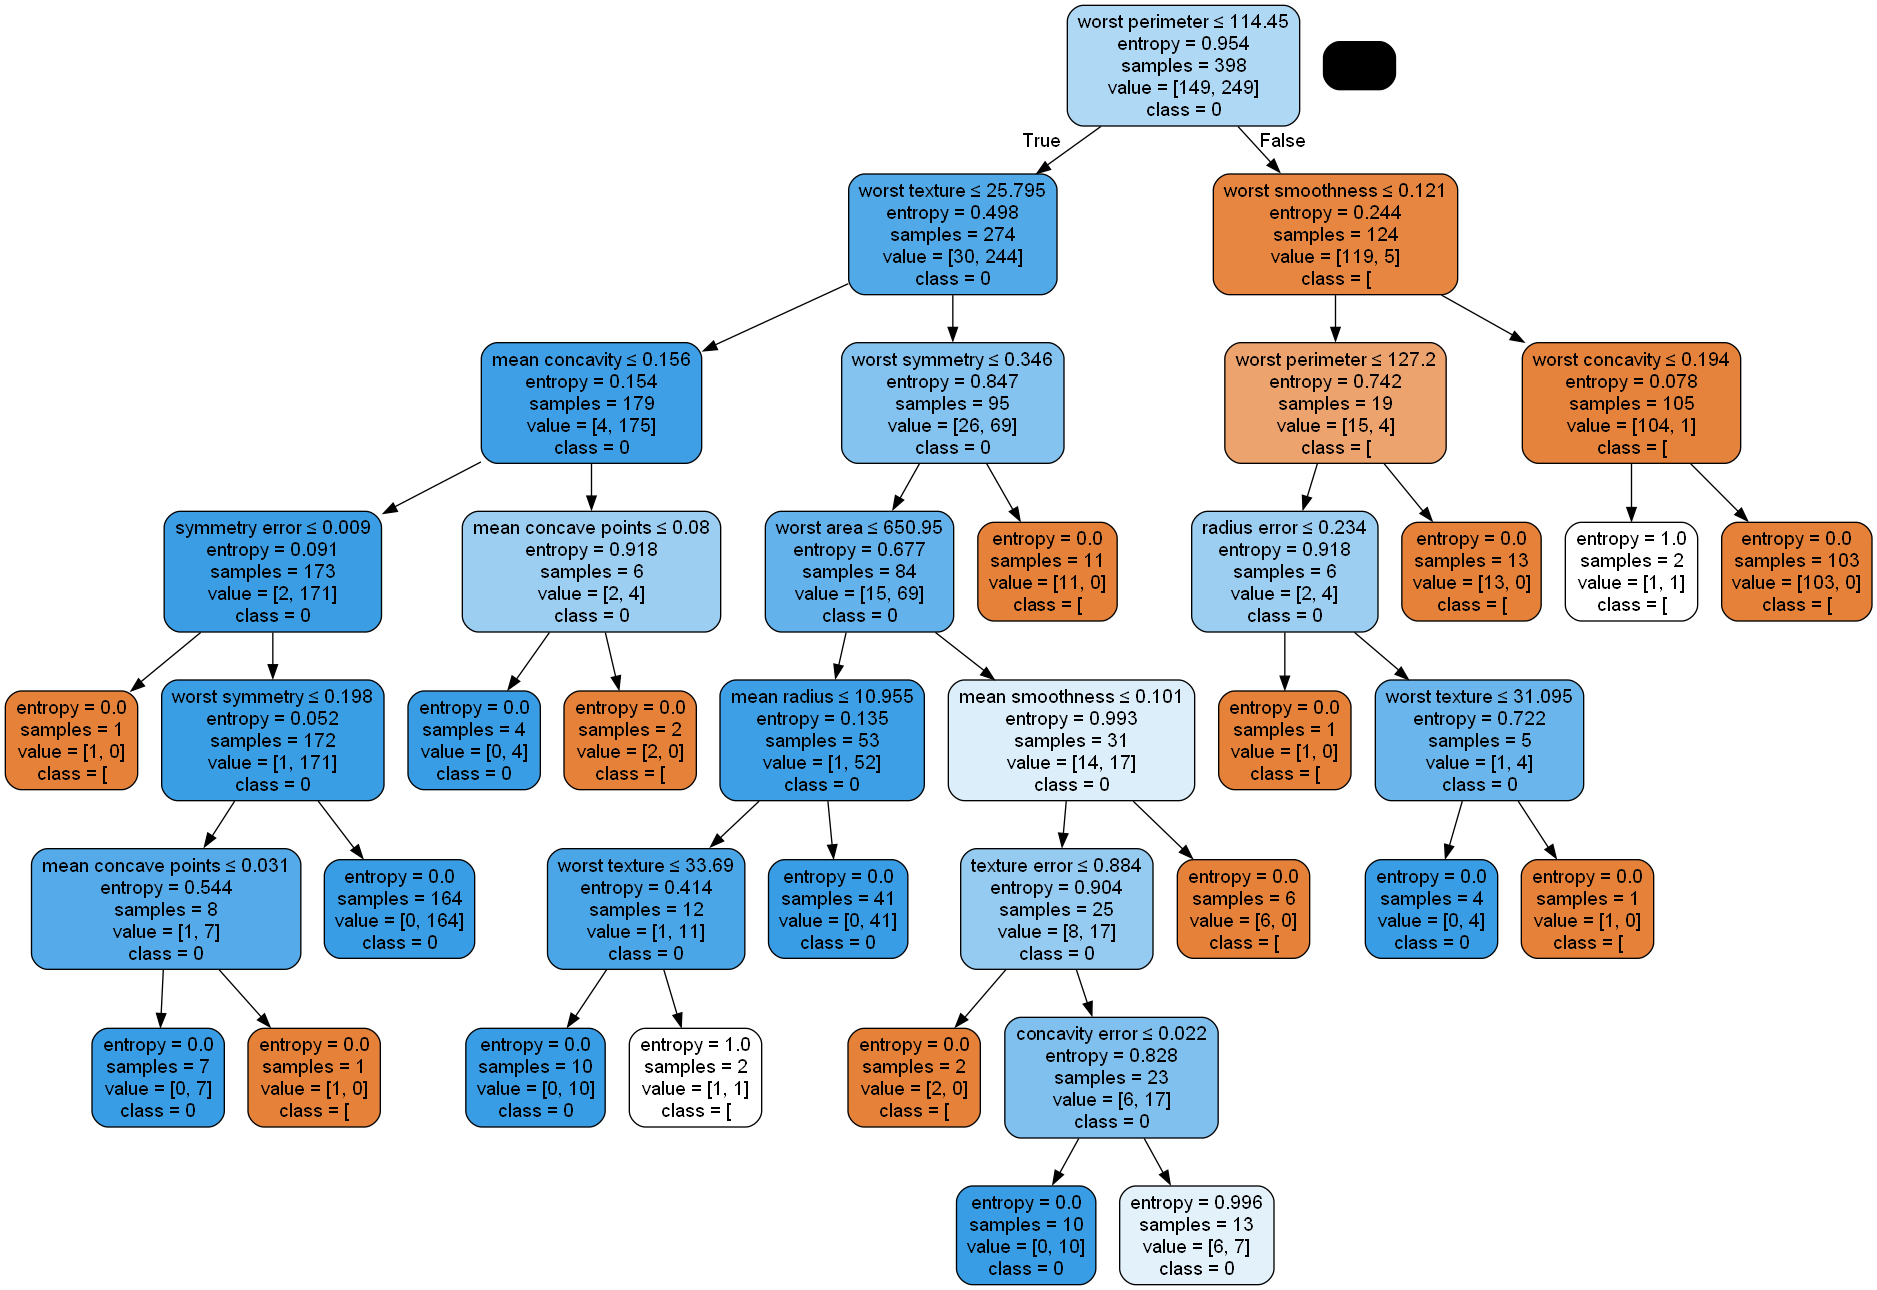

In [43]:
# 의사결정트리 시각화를 위한 작업
# 트리 시각화를 위한 export_graphviz 모듈 임포트 (이를 위해 graphviz 별도 설치 필요)
from sklearn.tree import export_graphviz
import pydotplus  # graphviz의 dot language 와의 인터페이스를 제공하는 패키지 임포트
from IPython.display import Image  # IPython의 display와 관련된 Public API

x_list = list(X.columns)
y_list = list(y.drop_duplicates(inplace=False))

# export_graphviz() : 의사결정트리에 대한 graphviz dot data를 생성하는 함수
dot_data = export_graphviz(best_dt, out_file=None, feature_names=x_list,
                          class_names=str(y_list), filled=True, rounded=True, special_characters=True)
# matplotlib.rc('font', family='AppleGothic')
graph = pydotplus.graph_from_dot_data(dot_data)  # graphviz의 dot data로부터 트리 그래프 생성

# 트리 그래프를 위한 png 이미지 생성 및 출력
Image(graph.create_png())